In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [4]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
df.groupId.nunique()

2026745

# 전처리 시작

### 결측치 제거

In [6]:
df = df.dropna()

### 필요한 columns 추출

In [7]:
df_train = df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'kills',
       'killStreaks', 'longestKill', 'matchType',
       'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPlacePerc']]


In [8]:
df_train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,squad-fpp,0,0.0000,0,0.000,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,squad-fpp,0,0.0045,0,11.040,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,duo,0,0.0000,0,0.000,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,squad-fpp,0,0.0000,0,0.000,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,solo-fpp,0,0.0000,0,0.000,0,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,squad-fpp,0,1292.0000,0,0.000,0,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,0,0,0.00,solo,0,0.0000,0,0.000,0,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,0,0,0.00,squad-fpp,0,0.0000,0,2.184,0,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,2,1,98.50,squad-fpp,2,0.0000,0,0.000,0,2748.00,8,0.8000


### solo 1로 통합

In [9]:
df_train.loc[df_train['matchType'] == 'solo-fpp', 'matchType'] = 1
df_train.loc[df_train['matchType'] == 'solo', 'matchType'] = 1

### duo 2로 통합

In [10]:
df_train.loc[df_train['matchType'] == 'duo-fpp', 'matchType'] = 2
df_train.loc[df_train['matchType'] == 'duo', 'matchType'] = 2

### squad 3으로 통합

In [11]:
df_train.loc[df_train['matchType'] == 'squad-fpp', 'matchType'] = 3
df_train.loc[df_train['matchType'] == 'squad', 'matchType'] = 3

### event match 4로 통합

In [12]:
df_train.loc[df_train['matchType'] == 'normal-squad-fpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'crashfpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'flaretpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'normal-solo-fpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'flarefpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'normal-duo-fpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'normal-duo', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'normal-squad', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'crashtpp', 'matchType']= 4
df_train.loc[df_train['matchType'] == 'normal-solo', 'matchType']= 4

In [13]:
df_train.matchType.unique()

array([3, 2, 1, 4], dtype=object)

### matchType을 int로 변환

In [14]:
df_train['matchType'] = df_train['matchType'].astype(int)

/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/3133010291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['matchType'] = df_train['matchType'].astype(int)


### ridedistance가 0이면서 roadkill이 있는 경우 제거

In [15]:
df_train[(df_train['roadKills'] != 0) & (df_train['matchType'] != 4) & (df_train['rideDistance'] == 0.0000)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
820,1,1,334.80,4,0,1,2,1,50.9800,3,0,0.0,1,0.0,0,838.00,6,0.3704
40362,0,1,272.40,1,1,2,2,1,115.6000,3,0,0.0,1,127.7,0,2443.00,4,0.5357
46376,2,5,298.90,3,0,6,2,1,15.0900,2,1,0.0,1,0.0,0,3054.00,4,0.8980
50918,0,0,169.30,1,0,0,1,1,14.4200,2,0,0.0,1,0.0,0,148.60,1,0.1333
55266,0,0,100.00,2,0,0,1,1,64.0600,3,1,0.0,1,0.0,0,696.00,3,0.3704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,0,3,328.90,1,1,2,4,2,127.0000,2,0,0.0,1,104.6,0,2505.00,4,0.8696
4418648,0,0,96.43,1,0,0,1,1,7.6800,3,0,0.0,1,0.0,0,1293.00,3,0.3462
4426830,0,0,100.00,1,0,0,1,1,0.8003,3,0,0.0,1,0.0,0,29.41,1,0.0400
4444830,0,6,442.90,4,0,6,5,2,59.2300,2,0,0.0,1,0.0,0,2875.00,5,0.8367


In [16]:
a = df_train[(df_train['roadKills'] != 0) & (df_train['matchType'] != 4) & (df_train['rideDistance'] == 0.0000)].index
a

Int64Index([    820,   40362,   46376,   50918,   55266,  102175,  113697,
             128559,  209489,  211917,
            ...
            4291737, 4345133, 4355163, 4363909, 4413741, 4417743, 4418648,
            4426830, 4444830, 4446736],
           dtype='int64', length=185)

In [17]:
df_train.drop(a, inplace=True)

/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/3398910598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(a, inplace=True)


In [18]:
b = df_train[(df_train['kills'] != 0) & (df_train['damageDealt'] == 0) & (df_train['matchType'] != 4)].index
b

Int64Index([    892,     942,    2448,    2850,    3011,    4747,    4959,
               7358,    7618,    8079,
            ...
            4440499, 4440912, 4441359, 4441825, 4443196, 4444208, 4444586,
            4444646, 4445499, 4446126],
           dtype='int64', length=4052)

In [19]:
df_train.drop(b, inplace=True)

/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/2639866218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(b, inplace=True)


### 3가지 distance를 통합

In [20]:
df_train['distance'] = df_train['walkDistance'] + df_train['swimDistance'] + df_train['rideDistance']


/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/1432183307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance'] = df_train['walkDistance'] + df_train['swimDistance'] + df_train['rideDistance']


In [21]:
df_train.drop(['swimDistance', 'walkDistance', 'rideDistance'], axis=1, inplace=True)

/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/3124548589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['swimDistance', 'walkDistance', 'rideDistance'], axis=1, inplace=True)


### damaegDealt > 5000 제거

In [105]:
df_train.drop(df_train[df_train.damageDealt > 5000].index, inplace=True)

/var/folders/4k/8l6_wyfs3g19brd7yqm854c80000gn/T/ipykernel_3686/2715634412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(df_train[df_train.damageDealt > 5000].index, inplace=True)


# 전처리 끝

In [110]:
df_train.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4446956, 4446957, 4446958, 4446959, 4446960, 4446961, 4446962,
            4446963, 4446964, 4446965],
           dtype='int64', length=4442715)

<AxesSubplot:xlabel='damageDealt', ylabel='winPlacePerc'>

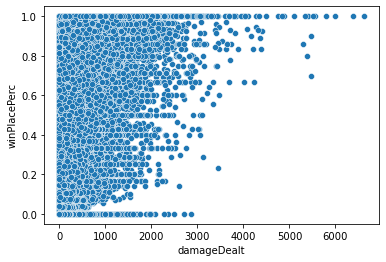

In [79]:
sns.scatterplot(data = df, x = 'damageDealt', y = 'winPlacePerc')

In [22]:
# df_train[df_train['weaponsAcquired'] >= 1].count()

# df_weapon = df_train[(df_train['weaponsAcquired'] > 50) & (df_train['matchType'] != 4)]
# df_weapon

In [23]:
# weapon = df_weapon['groupId'].tolist()

In [24]:
# sns.scatterplot(data=df_train, x = 'walkDistance', y = 'matchType')

In [25]:
# df_train[df_train['walkDistance'] > 14000].count()

In [26]:
# df.groupId.nunique()

In [27]:
# df_train.head(20)
# df_train.groupId.nunique()
# df_train.groupId.head(40000)

In [28]:
# k = 0
# for i in range(len(df_train)):
#     df_train.loc[df_train['groupId'] == df_train.iloc[i, 0], 'groupId'] = k
#     k = k+1

In [29]:
# df_duo 생성
# df_duo = df_train[(df_train['matchType'] == 'duo-fpp')|(df_train['matchType'] == 'duo')]
# df_duo

In [30]:
# df_squad 생성
# df_squad = df_train[(df_train['matchType'] == 'squad-fpp')|(df_train['matchType'] == 'squad')]
# df_squad


In [31]:
# sns.scatterplot(data=df_train, x = 'winPlacePerc', y = 'rideDistance')

In [32]:
# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

# vif["features"] = df1.columns

# vif

In [33]:
# sns.lineplot(data=df_solo, y = 'kills', x ='damageDealt')

In [34]:
# plt.figure(figsize = (23,23))
# sns.heatmap(df_train.corr(), annot=True, linewidths=1, annot_kws={'size' : 21})

In [35]:
# plt.figure(figsize = (23,23))
# sns.heatmap(df_duo.corr(), annot=True, linewidths=1, annot_kws={'size' : 21})

In [36]:
# plt.figure(figsize = (23,23))
# sns.heatmap(df_squad.corr(), annot=True, linewidths=1, annot_kws={'size' : 21})

In [37]:
# df.info()

In [38]:
# df.corr()

In [39]:
# sns.scatterplot(data=df1, y = 'rideDistance', x = 'winPlacePerc', alpha=.3)
# plt.show()

In [40]:
# df_train.head()

In [41]:
# df_train.columns

In [72]:
df_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,revives,roadKills,vehicleDestroys,weaponsAcquired,winPlacePerc,distance
count,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06,4.442728e+06
mean,2.339367e-01,1.107253e+00,1.308302e+02,6.583903e-01,2.268079e-01,1.370547e+00,9.246170e-01,5.434857e-01,2.296934e+01,2.389723e+00,1.646761e-01,3.441579e-03,7.918108e-03,3.660833e+00,4.728823e-01,1.765119e+03
std,5.887342e-01,1.716074e+00,1.708072e+02,1.146025e+00,6.022912e-01,2.680352e+00,1.559079e+00,7.111179e-01,5.093206e+01,7.597744e-01,4.722097e-01,7.299397e-02,9.260746e-02,2.456725e+00,3.074031e-01,2.183241e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,1.582000e+02
50%,0.000000e+00,0.000000e+00,8.444000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.583000e-01,7.887000e+02
75%,0.000000e+00,2.000000e+00,1.861000e+02,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.128000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,7.407000e-01,2.729000e+03
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,7.200000e+01,2.000000e+01,1.094000e+03,4.000000e+00,3.900000e+01,1.800000e+01,5.000000e+00,2.360000e+02,1.000000e+00,4.127010e+04


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [49]:
x_num = df_train[['damageDealt', 'longestKill', 'distance', 'weaponsAcquired']]

scaler = StandardScaler()
scaler.fit(x_num)
x_scaled = scaler.transform(x_num)
x_scaled = pd.DataFrame( x_scaled, index=x_num.index, columns=x_num.columns)

x_cat = df_train.drop(['damageDealt', 'longestKill', 'distance', 'weaponsAcquired', 'winPlacePerc'], axis=1)
# x_cat = pd.get_dummies(x_cat)

X = pd.concat([x_scaled, x_cat], axis = 1)
y = df_train['winPlacePerc']

In [112]:
x_scaled

,damageDealt,longestKill,distance,weaponsAcquired
0,-0.765952,-0.450980,-0.696359,-1.083082
1,-0.230436,-0.450980,-0.146605,0.545103
2,-0.367843,-0.450980,-0.734376,-0.676036
3,-0.573338,-0.450980,-0.715642,-0.268990
4,-0.180497,0.698198,-0.785699,-0.676036
...,...,...,...,...
4446961,-0.765952,-0.450980,0.250032,-0.268990
4446962,-0.507474,-0.450980,-0.771064,0.952149
4446963,-0.420183,-0.450980,-0.446234,0.138056
4446964,0.290209,1.482969,0.450194,1.766241


In [62]:
dis_mm = df_train[['distance']]
scaler = MinMaxScaler()
scaler.fit(dis_mm)

dis_scaled = scaler.transform(dis_mm)
dis_scaled

array([[0.00593166],
       [0.03501432],
       [0.00392051],
       ...,
       [0.01916361],
       [0.06658574],
       [0.0633146 ]])

In [65]:
dis_scaled = pd.DataFrame(dis_scaled, index = dis_mm.index, columns = dis_mm.columns)

In [68]:
dis_scaled

,distance
0,0.005932
1,0.035014
2,0.003921
3,0.004912
4,0.001205
...,...
4446961,0.055997
4446962,0.001980
4446963,0.019164
4446964,0.066586


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
from lightgbm.sklearn import LGBMRegressor

In [53]:
model_reg = LGBMRegressor()
model_reg.fit(X_train, y_train)

LGBMRegressor()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [55]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.10616334087287456
0.14379355544133984
